In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from glob import glob
from scipy.interpolate import interp1d, BSpline, splrep

import mpl_style as mplt
import matplotlib
from dark_matter_limit_plotter import make_spline
import constants as const
from scipy.special import erf

plt.style.use(['mvstyle', 'one_piece', 'half_page'])

In [2]:
def Cgeom(mdm, Rstar, BR):
    """
    Geometric Cross section of the NS in natural units

    mdm in GeV
    R in km
    """

    return np.pi * (Rstar * const.kmTOm * const.mTOinveV)**2 * (1.0 - BR) * (const.rhoDM / const.cmTOm**3 / const.mTOinveV**3) * erf(np.sqrt(3.0 * const.vs/2.0/const.vd)) / BR / (const.vs * const.kmTOm / const.cspeed) / mdm

# Capture 1 Fullmass

In [8]:
n = 1
m1, c1 = np.loadtxt(f'capture_1_fullmass/cap_n{n:d}_PB.tsv', unpack=True)
c1 = make_spline(m1, c1, 0.001, 3)
m2, c2 = np.loadtxt(f'capture_1_fullmass/cap_n{n:d}_noPB.tsv', unpack=True)
c2 = make_spline(m2, c2, 0.001, 3)

Rstar = 12.593
BR = 0.648

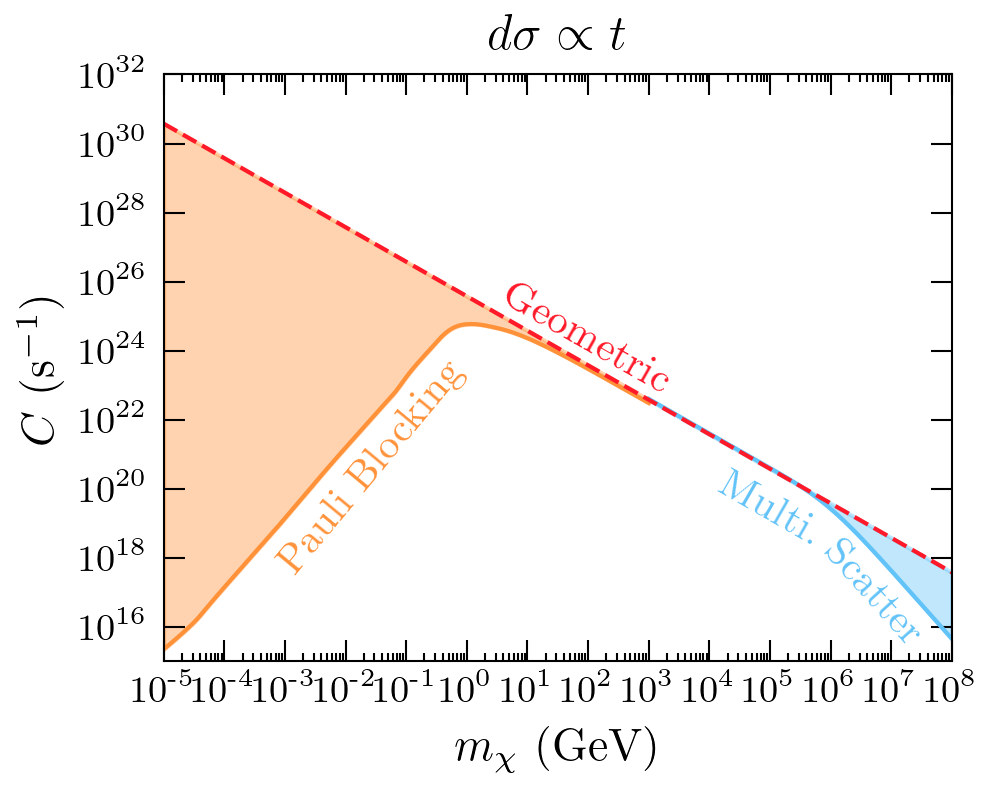

In [11]:
fig, ax = plt.subplots()
masses_low = np.logspace(-5, 3, 200)
masses_high = np.logspace(3, 8, 200)

masses = np.append(masses_low[:-1], masses_high)

mplt.loglog(ax, masses_low, c1(masses_low), label = r'100 MeV', c = 'C02')
mplt.loglog(ax, masses_high, c2(masses_high), label = r'200 MeV', c = 'C01')
mplt.loglog(ax, masses, Cgeom(masses, Rstar, BR)/const.inveVTOs, ls = '--', c= 'C00')
plt.xlabel(r'$m_\chi$ (GeV)')
plt.ylabel(r'$C$ (s$^{-1}$)')

if n == 0:
    plt.title(r'$\sigma\propto$ const.')
elif n == 1:
    plt.title(r'$d\sigma\propto t$')
else:
    plt.title(r'$d\sigma\propto t^{}$'.format(n))

mplt.set_lims(ax)

locmajy = matplotlib.ticker.LogLocator(base=10.0, numticks=10)
ax.yaxis.set_major_locator(locmajy)
ax.tick_params(axis ='y', which = 'minor', width = 0)

ax.fill_between(masses_low, c1(masses_low), Cgeom(masses_low, Rstar, BR)/const.inveVTOs, ec = 'none', color = 'C02', alpha = 0.4)
ax.fill_between(masses_high, c2(masses_high), Cgeom(masses_high, Rstar, BR)/const.inveVTOs, ec = 'none', color = 'C01', alpha = 0.4)

ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)

mplt.label_line(ax, [masses_low, c1(masses_low)], r'Pauli Blocking', 1e-2, halign='center', valign='center', xshift = 6, yshift= -5, txt_col = 'C02', rotn_adj=2)
# ax.text(0.3e-2, c1(0.3e-2)*0.4, r'Pauli Blocking', fontsize = 10, horizontalalignment = 'center', verticalalignment = 'top', color = 'C02')
mplt.label_line(ax, [masses, Cgeom(masses, Rstar, BR)/const.inveVTOs], r'Geometric', 1e2, halign='center', valign='center', yshift= 6, txt_col = 'C00')
mplt.label_line(ax, [masses_high, c2(masses_high)], r'Multi.', 1e5, halign='center', valign='center', yshift= -10, txt_col = 'C01')
# mplt.label_line(ax, [masses_high, c2(masses_high)], r'Scatter', 1e7, halign='center', valign='center',xshift=-2, yshift= -10, txt_col = 'C01')
mplt.label_line(ax, [masses_high, c2(masses_high)], r'Scatter', 1e7, halign='center', valign='center',xshift=-4, yshift= -6, txt_col = 'C01')

plt.savefig(f'plots/cap_1/capture_rate_n{n:d}_fullmassrange.pdf')

# plt.legend(title = r'$\varepsilon_{F,n}$')
# plt.xlim(0.2, 0.7)
# plt.ylim()

In [14]:
const.kBeV * 1e3 * 1e12

86.17330340000000049

# $m^*$

In [161]:
n = 2
B1, mu1 = np.loadtxt(f'mstar/ms_n{n:d}_mu_0.1.tsv', unpack=True)
mu1 = make_spline(B1, mu1, 0.00001, 3)
B2, mu2 = np.loadtxt(f'mstar/ms_n{n:d}_mu_0.2.tsv', unpack=True)
mu2 = make_spline(B2, mu2, 0.00001, 3)
B4, mu4 = np.loadtxt(f'mstar/ms_n{n:d}_mu_0.4.tsv', unpack=True)
mu4 = make_spline(B4, mu4, 0.00001, 3)


(0.2, 0.7)

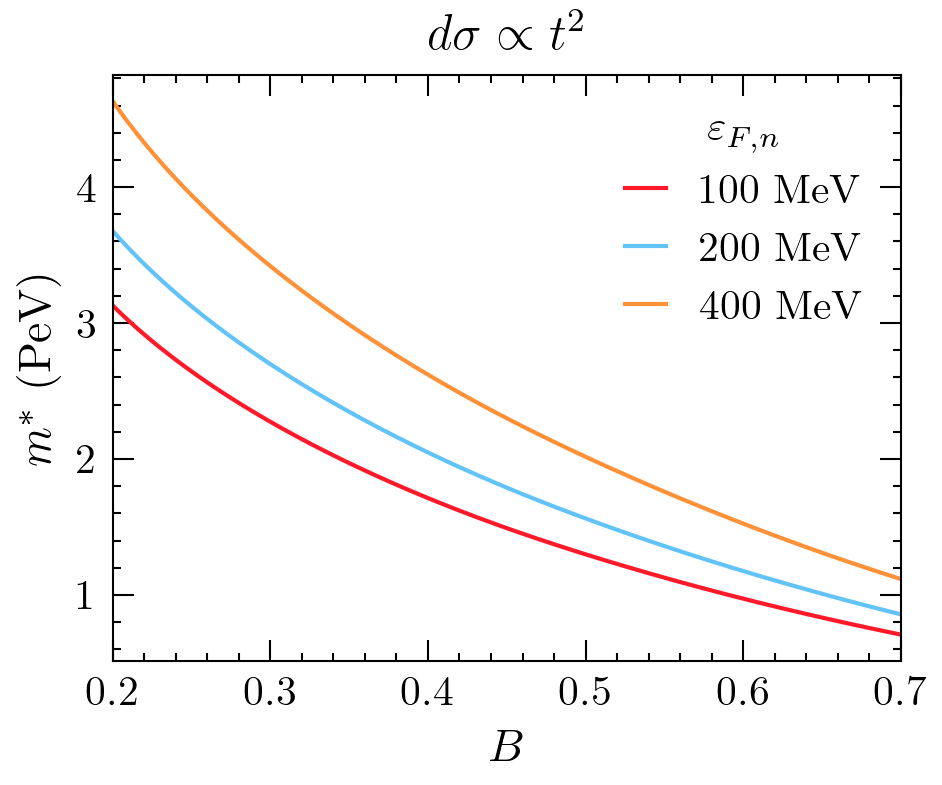

In [165]:
fig, ax = plt.subplots()
masses = np.linspace(0.2, 0.7, 200)
plt.plot(masses, mu1(masses), label = r'100 MeV')
plt.plot(masses, mu2(masses), label = r'200 MeV')
plt.plot(masses, mu4(masses), label = r'400 MeV')

plt.xlabel(r'$B$')
plt.ylabel(r'$m^*$ (PeV)')

if n == 0:
    plt.title(r'$\sigma\propto$ const.')
elif n == 1:
    plt.title(r'$d\sigma\propto t$')
else:
    plt.title(r'$d\sigma\propto t^{}$'.format(n))

plt.legend(title = r'$\varepsilon_{F,n}$')
plt.xlim(0.2, 0.7)
plt.ylim()

# Capture Rates

In [3]:


m1, apx_PB = np.loadtxt('capture_1/approx_comp/appx_PB.tsv', unpack=True)
apx_pb_int = make_spline(m1, apx_PB, 0.001, 3)

m1, num_PB = np.loadtxt('capture_1/approx_comp/numeric_PB.tsv', unpack=True)
num_pb_int = make_spline(m1, num_PB, 0.01, 3)

Rstar = 12.593
BR = 0.648

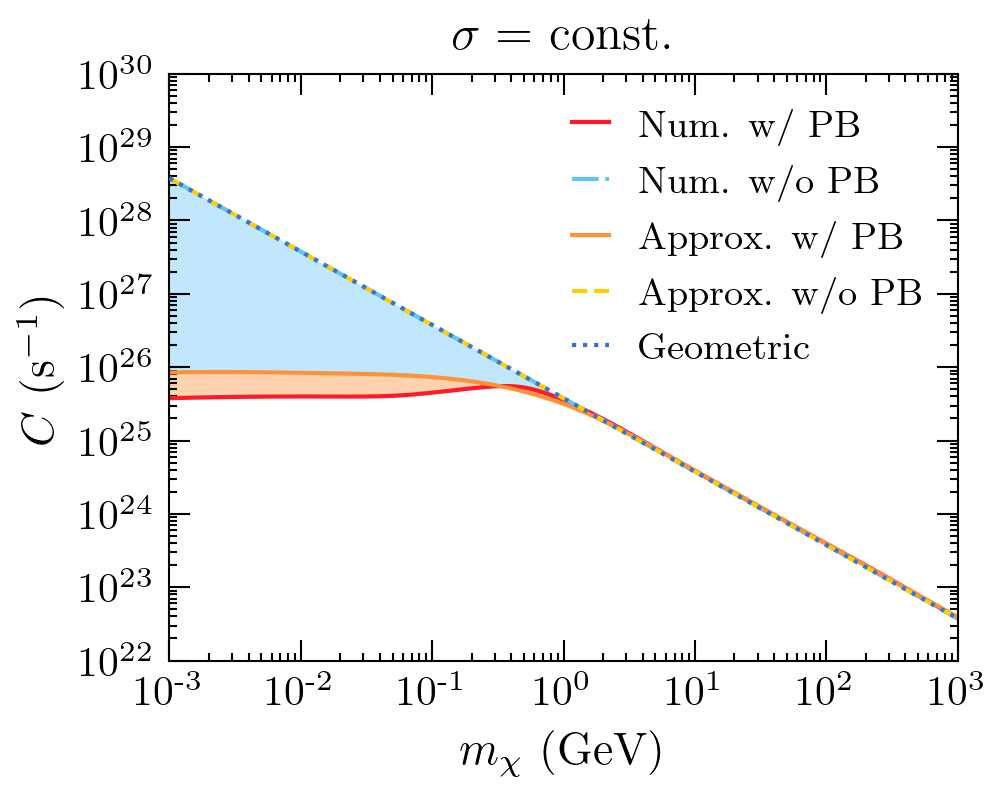

In [5]:
fig, ax = plt.subplots()

masses = np.logspace(-3, 3, 300)

mplt.loglog(ax, masses, num_pb_int(masses), label = r'Num. w/ PB')
mplt.loglog(ax, masses, Cgeom(masses, Rstar, BR)/const.inveVTOs, ls = '-.', label = r'Num. w/o PB')
mplt.loglog(ax, masses, apx_pb_int(masses), label = r'Approx. w/ PB')
mplt.loglog(ax, masses, Cgeom(masses, Rstar, BR)/const.inveVTOs, ls = '--', label = r'Approx. w/o PB')
mplt.loglog(ax, masses, Cgeom(masses, Rstar, BR)/const.inveVTOs, ls = ':', label = r'Geometric', zorder =10)
# mplt.loglog(ax, m1, num_PB)

ax.fill_between(masses, apx_pb_int(masses), Cgeom(masses, Rstar, BR)/const.inveVTOs, color = 'C01', alpha = 0.4, ec = 'none')
ax.fill_between(masses, num_pb_int(masses), apx_pb_int(masses), color = 'C02', alpha = 0.4, ec = 'none')

plt.legend(fontsize = '9')
plt.title(r'$\sigma =$ const.')
plt.xlabel(r'$m_\chi$ (GeV)' )
plt.ylabel(r'$C$ (s$^{-1}$)')
plt.xlim(1e-3, 1e3)
plt.ylim(1e22, 1e30)

plt.savefig('plots/cap_1/capture_rate_n0.pdf')

In [6]:


m1, apx_PB = np.loadtxt('capture_1/approx_comp/appx_PB_1.tsv', unpack=True)
apx_pb_int = make_spline(m1, apx_PB, 0.001, 3)

m1, apx_nPB = np.loadtxt('capture_1/approx_comp/appx_nPB_1.tsv', unpack=True)
apx_npb_int = make_spline(m1, apx_nPB, 0.001, 3)

m1, num_PB = np.loadtxt('capture_1/approx_comp/numeric_PB_1.tsv', unpack=True)
num_pb_int = make_spline(m1, num_PB, 0.01, 3)

m1, num_nPB = np.loadtxt('capture_1/approx_comp/numeric_nPB_1.tsv', unpack=True)
num_npb_int = make_spline(m1, num_nPB, 0.01, 3)


Rstar = 12.593
BR = 0.648

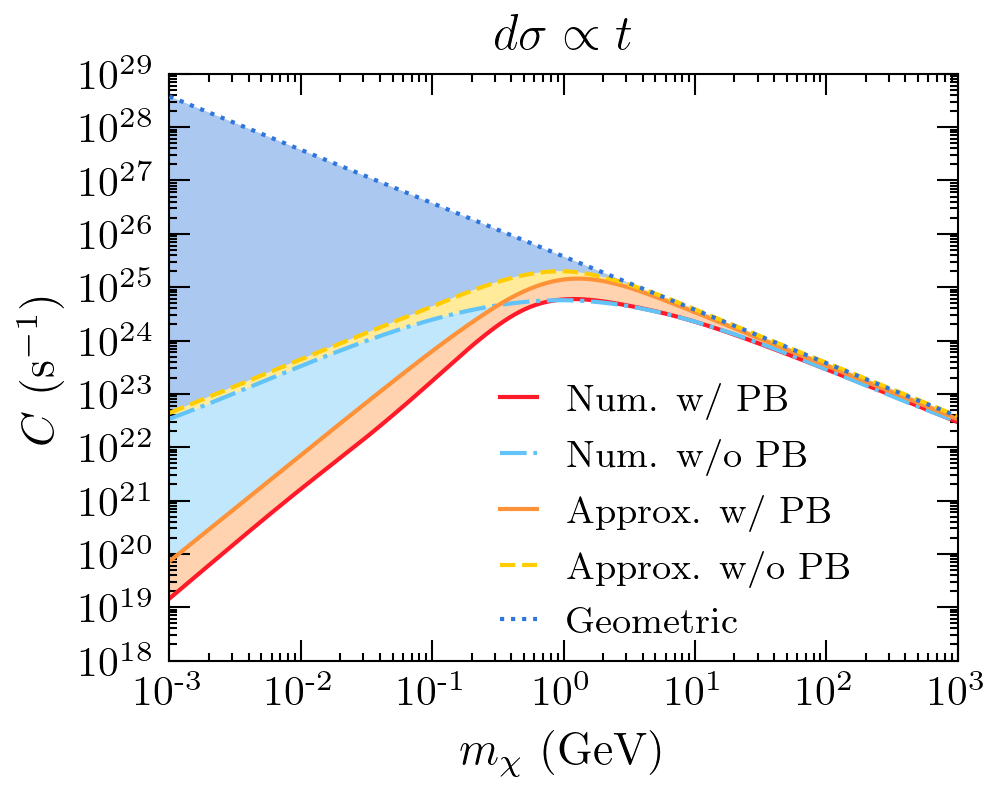

In [7]:
fig, ax = plt.subplots()

masses = np.logspace(-3, 3, 300)

mplt.loglog(ax, masses, num_pb_int(masses), label = r'Num. w/ PB')
mplt.loglog(ax, masses, num_npb_int(masses), ls = '-.', label = r'Num. w/o PB')
mplt.loglog(ax, masses, apx_pb_int(masses), label = r'Approx. w/ PB')
mplt.loglog(ax, masses, apx_npb_int(masses), ls = '--', label = r'Approx. w/o PB')
mplt.loglog(ax, masses, Cgeom(masses, Rstar, BR)/const.inveVTOs, ls = ':', label = r'Geometric', zorder =10)
# mplt.loglog(ax, m1, num_PB)

ax.fill_between(masses, apx_npb_int(masses), Cgeom(masses, Rstar, BR)/const.inveVTOs, color = 'C04', alpha = 0.4, ec = 'none')
ax.fill_between(masses, np.maximum(num_npb_int(masses), apx_pb_int(masses)), apx_npb_int(masses), color = 'C03', alpha = 0.4, ec = 'none')
ax.fill_between(masses, np.minimum(num_npb_int(masses), apx_pb_int(masses)), num_npb_int(masses), color = 'C01', alpha = 0.4, ec = 'none')
ax.fill_between(masses, num_pb_int(masses), apx_pb_int(masses), color = 'C02', alpha = 0.4, ec = 'none')


plt.legend(fontsize = '9', loc = (0.4, 0.01))
plt.title(r'$d\sigma \propto t$')
plt.xlabel(r'$m_\chi$ (GeV)' )
plt.ylabel(r'$C$ (s$^{-1}$)')
plt.xlim(1e-3, 1e3)
plt.ylim(1e18, 1e29)

plt.savefig('plots/cap_1/capture_rate_n1.pdf')

In [8]:


m1, apx_PB = np.loadtxt('capture_1/approx_comp/appx_PB_2.tsv', unpack=True)
apx_pb_int = make_spline(m1, apx_PB, 0.001, 3)

m1, apx_nPB = np.loadtxt('capture_1/approx_comp/appx_nPB_2.tsv', unpack=True)
apx_npb_int = make_spline(m1, apx_nPB, 0.001, 3)

m1, num_PB = np.loadtxt('capture_1/approx_comp/numeric_PB_2.tsv', unpack=True)
num_pb_int = make_spline(m1, num_PB, 0.01, 3)

m1, num_nPB = np.loadtxt('capture_1/approx_comp/numeric_nPB_2.tsv', unpack=True)
num_npb_int = make_spline(m1, num_nPB, 0.01, 3)


Rstar = 12.593
BR = 0.648

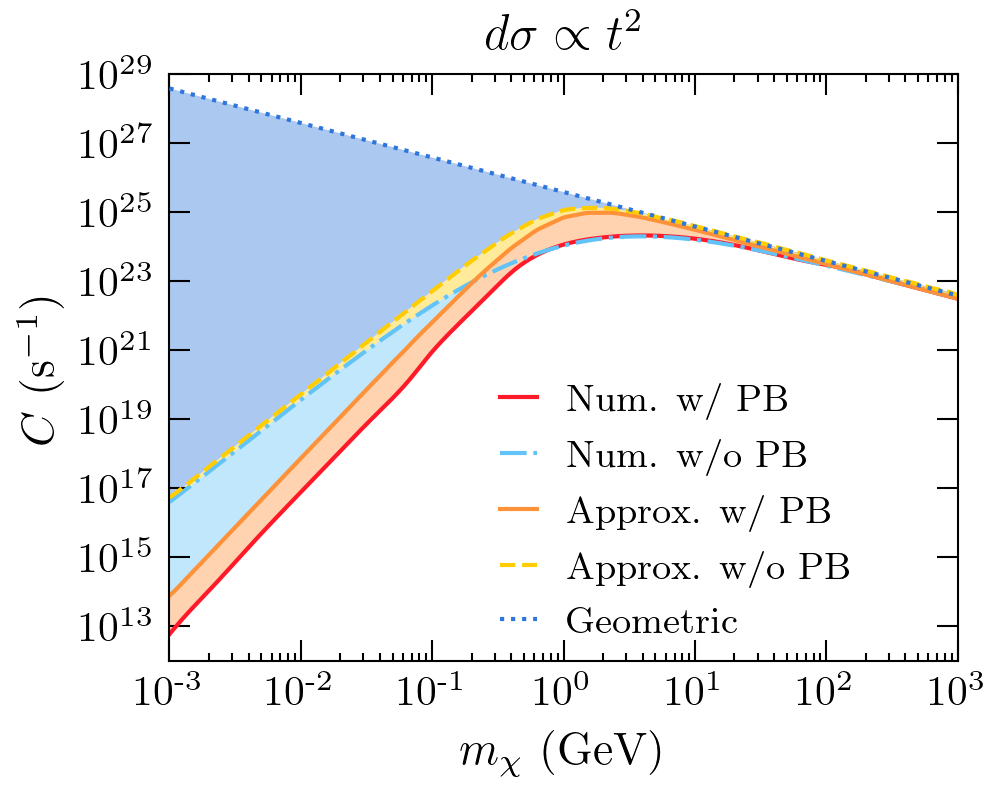

In [9]:
fig, ax = plt.subplots()

masses = np.logspace(-3, 3, 300)

mplt.loglog(ax, masses, num_pb_int(masses), label = r'Num. w/ PB')
mplt.loglog(ax, masses, num_npb_int(masses), ls = '-.', label = r'Num. w/o PB')
mplt.loglog(ax, masses, apx_pb_int(masses), label = r'Approx. w/ PB')
mplt.loglog(ax, masses, apx_npb_int(masses), ls = '--', label = r'Approx. w/o PB')
mplt.loglog(ax, masses, Cgeom(masses, Rstar, BR)/const.inveVTOs, ls = ':', label = r'Geometric', zorder =10)
# mplt.loglog(ax, m1, num_PB)

ax.fill_between(masses, apx_npb_int(masses), Cgeom(masses, Rstar, BR)/const.inveVTOs, color = 'C04', alpha = 0.4, ec = 'none')
ax.fill_between(masses, np.maximum(num_npb_int(masses), apx_pb_int(masses)), apx_npb_int(masses), color = 'C03', alpha = 0.4, ec = 'none')
ax.fill_between(masses, np.minimum(num_npb_int(masses), apx_pb_int(masses)), num_npb_int(masses), color = 'C01', alpha = 0.4, ec = 'none')
ax.fill_between(masses, num_pb_int(masses), apx_pb_int(masses), color = 'C02', alpha = 0.4, ec = 'none')


plt.legend(fontsize = '9', loc = (0.4, 0.01))
plt.title(r'$d\sigma \propto t^2$')
plt.xlabel(r'$m_\chi$ (GeV)' )
plt.ylabel(r'$C$ (s$^{-1}$)')
plt.xlim(1e-3, 1e3)
plt.ylim(1e12, 1e29)

locmajy = matplotlib.ticker.LogLocator(base=10.0, numticks=15)
ax.yaxis.set_major_locator(locmajy)
ax.tick_params(axis ='y', which = 'minor', width = 0)

plt.savefig('plots/cap_1/capture_rate_n2.pdf')

# Galaxy Rotation Curves

In [2]:
full_x, full_y = np.loadtxt('galaxy_rotation/N6503_full.dat', unpack=True)
full_interp = make_spline(full_x, full_y, xscale='linear', yscale='linear', degree=3, smoothing=0.1)

halo_x, halo_y = np.loadtxt('galaxy_rotation/N6503_halo.dat', unpack=True)
halo_interp = make_spline(halo_x, halo_y, xscale='linear', yscale='linear', degree=3, smoothing=1)

disk_x, disk_y = np.loadtxt('galaxy_rotation/N6503_disk.dat', unpack=True)
disk_interp = make_spline(disk_x, disk_y, xscale='linear', yscale='linear', degree=3, smoothing=1)

gas_x, gas_y = np.loadtxt('galaxy_rotation/N6503_gas.dat', unpack=True)
gas_interp = make_spline(gas_x, gas_y, xscale='linear', yscale='linear', degree=3, smoothing=1)

raw_x, raw_y, raw_err_y = np.loadtxt('galaxy_rotation/N6503_raw.dat', unpack=True)

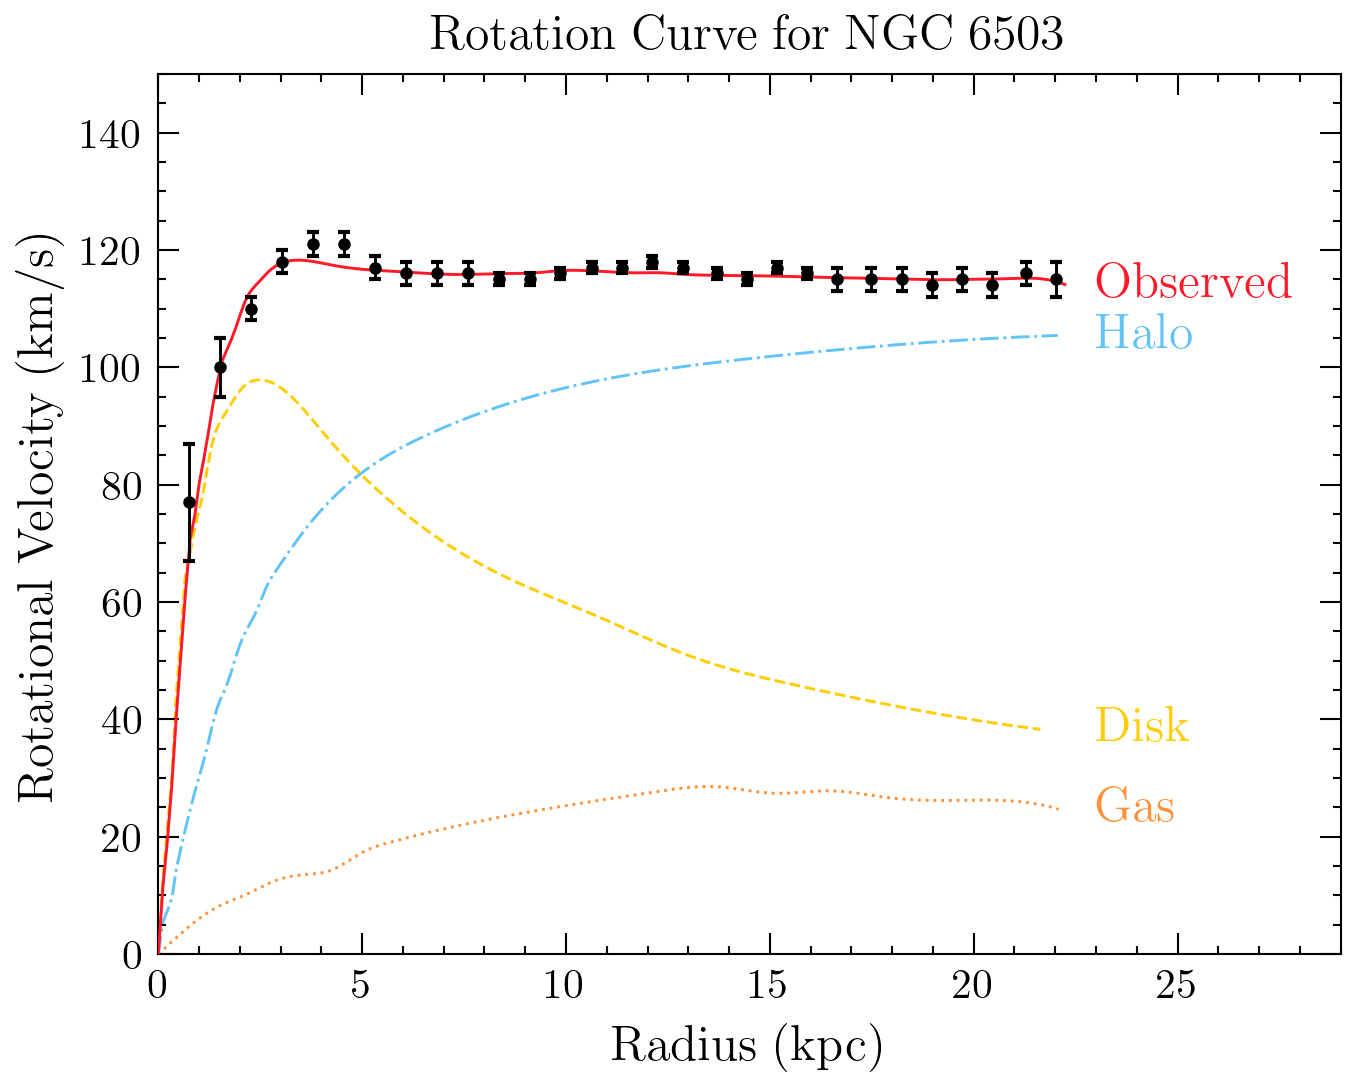

In [5]:

fig, ax = plt.subplots()

x_full = np.linspace(0, full_x[-1], 200)
ax.plot(x_full, full_interp(x_full), zorder = 10)
col = ax.get_lines()[-1].get_color()
ax.text(23, full_interp(x_full[-1]), r'$\mathrm{Observed}$', horizontalalignment = 'left', verticalalignment = 'center', color = col)


x_halo = np.linspace(0, halo_x[-1], 200)
ax.plot(x_halo, halo_interp(x_halo), ls = '-.', zorder = -1)
col = ax.get_lines()[-1].get_color()
ax.text(23, halo_interp(x_halo[-1]), r'$\mathrm{Halo}$', horizontalalignment = 'left', verticalalignment = 'center', color = col)

x_gas = np.linspace(0, gas_x[-1], 200)
ax.plot(x_gas, gas_interp(x_gas), ls = ':', zorder = -1)
col = ax.get_lines()[-1].get_color()
ax.text(23, gas_interp(x_gas[-1]), r'$\mathrm{Gas}$', horizontalalignment = 'left', verticalalignment = 'center', color = col)

x_disk = np.linspace(0, disk_x[-1], 200)
ax.plot(x_disk, disk_interp(x_disk), ls = '--', zorder = -1)
col = ax.get_lines()[-1].get_color()
ax.text(23, disk_interp(x_disk[-1]), r'$\mathrm{Disk}$', horizontalalignment = 'left', verticalalignment = 'center', color = col)


# ax.scatter(raw_x, raw_y, c='black', zorder = 11)
ax.errorbar(raw_x[:-2], raw_y[:-2], yerr=raw_err_y[:-2], color = 'black',   , marker = 'o', markersize = 2, zorder = 11, linestyle = 'none')

plt.xlabel(r'$\mathrm{Radius\;(kpc)}$')
plt.ylabel(r'$\mathrm{Rotational\;Velocity\;(km/s)}$')
plt.title(r'$\mathrm{Rotation\;Curve\;for\;NGC\;6503}$')

plt.xlim(0, 29)
plt.ylim(0, 150)

plt.savefig("gal_rotn_N6503.pdf")


# Neutron Star Mass Radius


In [2]:
radii_constr, masses_constr = np.loadtxt('NS_mass_rads/max_radius.txt', unpack=True)

rad_19, mass_19 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk19_mr.txt', unpack=True)
rad_22, mass_22 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk22_mr.txt', unpack=True)
rad_24, mass_24 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk24_mr.txt', unpack=True)
rad_25, mass_25 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk25_mr.txt', unpack=True)
rad_26, mass_26 = np.loadtxt('NS_mass_rads/bsk mass radii/bsk26_mr.txt', unpack=True)


rad_Q1, mass_Q1 = np.loadtxt('NS_mass_rads/QMC_MR/QMC_1.txt', unpack=True)
rad_Q2, mass_Q2 = np.loadtxt('NS_mass_rads/QMC_MR/QMC_2.txt', unpack=True)
rad_Q3, mass_Q3 = np.loadtxt('NS_mass_rads/QMC_MR/QMC_3.txt', unpack=True)

QMC_1_interp = make_spline(rad_Q1, mass_Q1, smoothing=0.001, degree=3)
QMC_2_interp = make_spline(rad_Q2, mass_Q2, smoothing=0.001, degree=3)
QMC_3_interp = make_spline(rad_Q3, mass_Q3, smoothing=0.0001, degree=3)


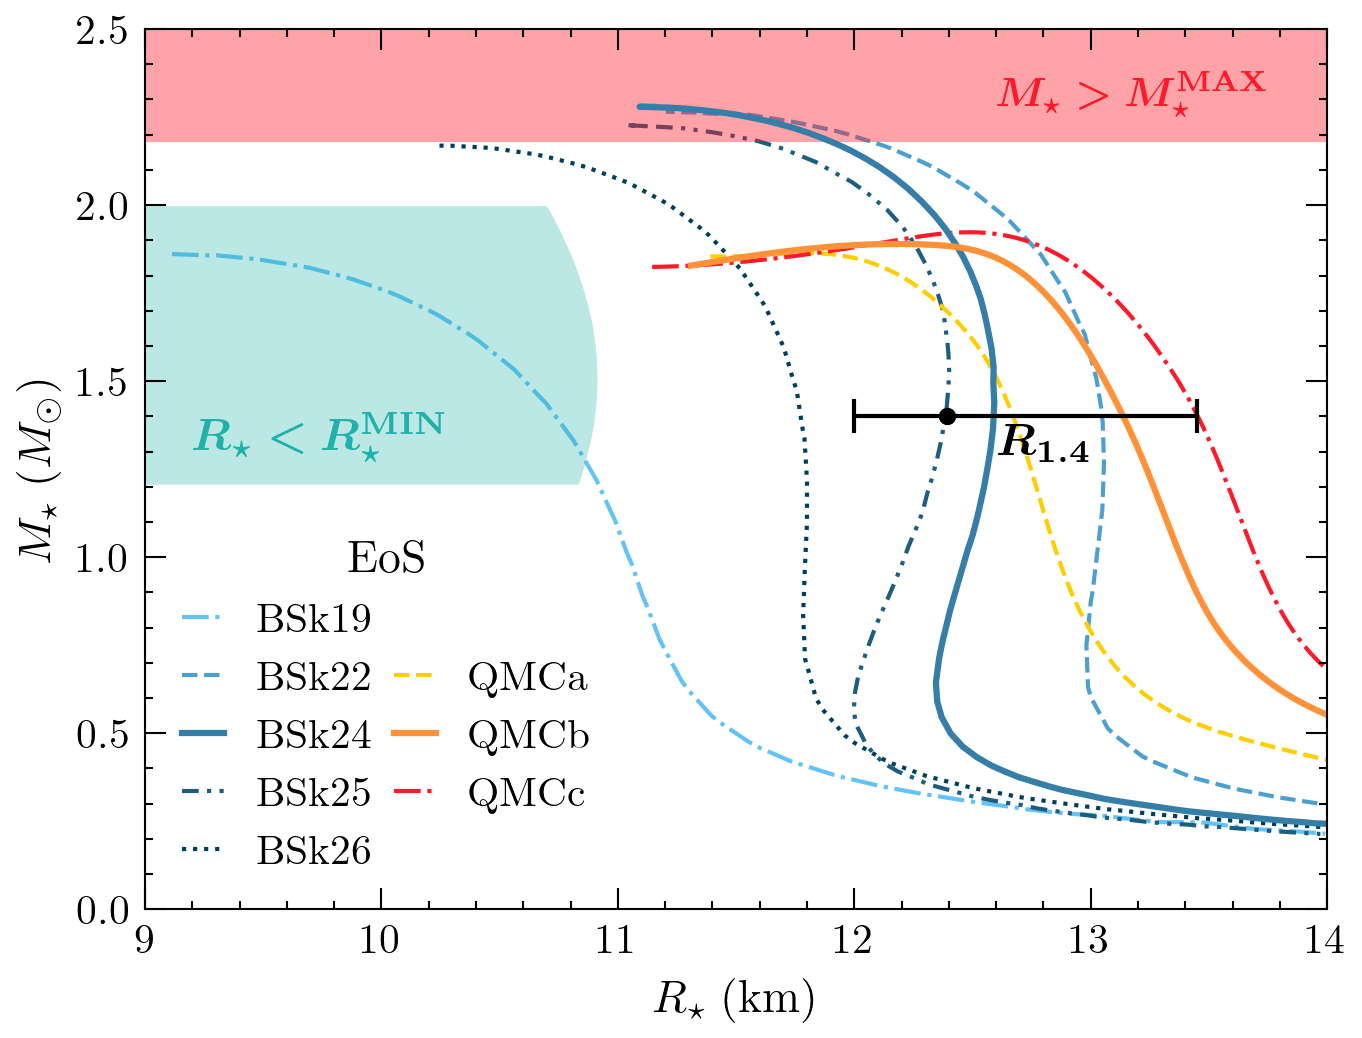

In [4]:
# radii_up = np.linspace()
# plt.plot(radii_constr, masses_constr, c = 'C08', alpha = 0.2)

bsk_cols = ['#003f5c', '#1c5d80', '#347ea7', '#4ba0cf', '#62c3f8']
plt.plot(rad_19, mass_19, ls = '-.', label = r'$\mathrm{BSk19}$', c = bsk_cols[-1], zorder = 1)
plt.plot(rad_22, mass_22, ls = '--', label = r'$\mathrm{BSk22}$', c = bsk_cols[-2], zorder = 1)
plt.plot(rad_24, mass_24, label = r'$\mathrm{BSk24}$', c = bsk_cols[-3], lw=1.5, zorder = 2)
plt.plot(rad_25, mass_25, ls = (0, (4, 2, 1, 2, 1, 2)), label = r'$\mathrm{BSk25}$', c = bsk_cols[-4], zorder = 1)
plt.plot(rad_26, mass_26, ls = ':', label = r'$\mathrm{BSk26}$', c = bsk_cols[-5], zorder = 1)


plt.plot(np.NaN, np.NaN, '-', color='none', label=' ')
# plt.plot(rad_Q1, mass_Q1, ls = '--', label = r'$\mathrm{QMC-1}$', c = 'C03', zorder = 1)
plt.plot(rad_Q1, QMC_1_interp(rad_Q1), ls = '--', label = r'$\mathrm{QMCa}$', c = 'C03', zorder = 1)
# plt.plot(rad_Q2, mass_Q2, label = r'$\mathrm{QMC-2}$', c = 'C02', zorder = 1)
plt.plot(rad_Q2, QMC_2_interp(rad_Q2), label = r'$\mathrm{QMCb}$', c = 'C02', lw = 1.5, zorder = 2)
# plt.plot(rad_Q3, mass_Q3, ls = '-.', label = r'$\mathrm{QMC-3}$', c = 'C00', zorder = 1)
plt.plot(rad_Q3, QMC_3_interp(rad_Q3), ls = '-.', label = r'$\mathrm{QMCc}$', c = 'C00', zorder = 1)
plt.plot(np.NaN, np.NaN, '-', color='none', label=' ')

R14 = 12.39
r_err = [[R14-12], [13.45 - R14]]
plt.scatter([R14], [1.4], s = 10, c ='black', zorder = 10)
plt.errorbar(R14, 1.4, xerr=r_err, c = 'black', capsize=4)

plt.fill_betweenx(masses_constr, 0, radii_constr, color = 'C08', alpha = 0.3, ec = 'none')
plt.fill_between((0, 14), 2.18, 2.5, alpha = 0.4, fc = 'C00')
# plt.fill_between((0, 9.6), 2.18, 2.5, fc = 'grey', alpha = 0.5)


# plt.fill_between(np.linspace(9, radii_constr.min(), 20), masses_constr.min(), masses_constr.max(), color = 'C08')
plt.xlim(9, 14)
plt.ylim(0, 2.5)

plt.xlabel(r'$R_\star\;\mathrm{(km) }$')
plt.ylabel(r'$M_\star\;{(M_\odot)}$')

# plt.text(9.2, 1.3, r'\textbf{GW170817:} $\bm{R_\star}$', horizontalalignment = 'left', c = 'C08', size = 11)
plt.text(9.2, 1.3, r'$\bm{R_\star < R^{\mathrm{MIN}}_\star}$', horizontalalignment = 'left', c = 'C08', size = 11)
plt.text(12.6, 2.25, r'$\bm{M_\star > M^{\mathrm{MAX}}_\star}$', horizontalalignment = 'left', verticalalignment = 'bottom', c = 'C00', size = 10)
# plt.text(9.06, 2.25, r'$\bm{R^{\mathrm{MAX}}_\star}$', horizontalalignment = 'left', verticalalignment = 'bottom', size = 10)
plt.text(12.8, 1.38, r'$\bm{R_{1.4}}$', horizontalalignment = 'center', verticalalignment = 'top')

plt.legend(title = r'EoS', ncol = 2)
plt.savefig('plots/NS_mass_radius.pdf')

In [ ]:
d